In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [8]:
data = pd.read_csv('TSLA.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [9]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [10]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
data.drop(['Adj Close'], axis = 1, inplace = True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500


In [13]:
train = data[:198]
test  = data[198:]

In [14]:
target_var = pd.DataFrame(data['Close'])
features = data[['Open', 'High', 'Low', 'Close' ,'Volume']]
target_var

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [15]:
features

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(features)
feature_transform

array([[4.64594174e-04, 1.34982149e-03, 4.21744904e-04, 1.31893210e-03,
        3.06604867e-01],
       [1.56759922e-03, 2.22389944e-03, 1.37067094e-03, 1.30915016e-03,
        2.80639852e-01],
       [1.43926727e-03, 1.49818896e-03, 8.71496305e-04, 1.00427957e-03,
        1.33184151e-01],
       ...,
       [7.52749776e-01, 8.01937480e-01, 7.56796518e-01, 8.07678787e-01,
        1.14096774e-01],
       [7.93312423e-01, 8.36481271e-01, 8.01812864e-01, 8.11860573e-01,
        1.30327868e-01],
       [8.17508664e-01, 8.23410451e-01, 8.12026969e-01, 8.23933120e-01,
        7.33616901e-02]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(feature_transform, target_var, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2364, 5) (592, 5) (2364, 1) (592, 1)


Root mean Square:  7.126170393417521e-14
Score:  1.0


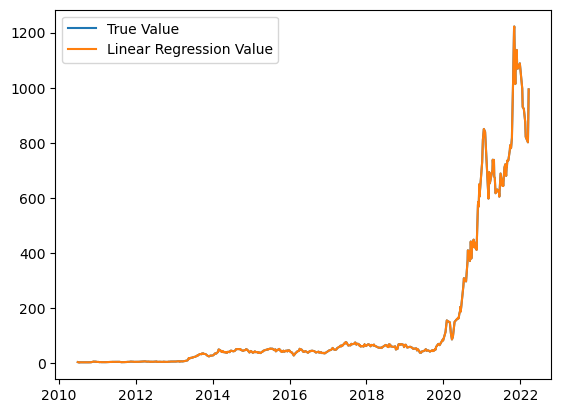

In [18]:
#1) Linear Regression
import sklearn
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

preds_lr = model_lr.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lr)),2)))
score_lr = model_lr.score(X_test,y_test)
print("Root mean Square: ",rms)
print("Score: ",score_lr)
preds_lr_df = pd.DataFrame(preds_lr)
preds_lr_df.index = y_test.index

plt.plot(y_test.sort_values("Date") , label='True Value')
plt.plot(preds_lr_df.sort_values("Date") , label='Linear Regression Value')
plt.legend()
plt.show()


In [19]:
#2) Support Vector Machines
import sklearn
model_svc = SVC(kernel='linear', C=0.025)

target_svc = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
svc_train = target_svc[:2364]
svc_test = target_svc[2364:]

model_svc.fit(X_train, svc_train)

preds_svc = model_svc.predict(X_test)

score_svc = model_svc.score(X_test,svc_test)

accuracy_svc = sklearn.metrics.accuracy_score(svc_train, model_svc.predict(X_train))
print("Score: ",score_svc)
preds_svc_df = pd.DataFrame(preds_svc)
preds_svc_df.index = y_test.index
print("Accuracy Ratio: ",accuracy_svc);

Score:  0.5574324324324325
Accuracy Ratio:  0.5080372250423012


In [20]:
#3) KNN
knn = KNeighborsClassifier()
target_knn = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
knn_train = target_knn[:2364]
knn_test = target_knn[2364:]

knn.fit(X_train,knn_train)
preds_knn = knn.predict(X_test)

score_knn = knn.score(X_test,knn_test)
print("Score: ",score_knn)
accuracy_knn = sklearn.metrics.accuracy_score(knn_train, knn.predict(X_train))
print("Accuracy Ratio: ",accuracy_knn);

Score:  0.48986486486486486
Accuracy Ratio:  0.6848561759729273
